In [2]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import pandas as pd
import numpy as np
def rsi(prices, period=14):
    
    num_prices = len(prices)

    if num_prices < period:
        # show error message
        raise SystemExit('Error: num_prices < period')

    # this could be named gains/losses to save time/memory in the future
    changes = prices[1:] - prices[:-1]
    #num_changes = len(changes)

    rsi_range = num_prices - period

    rsis = np.zeros(rsi_range)

    gains = np.array(changes)
    # assign 0 to all negative values
    masked_gains = gains < 0
    gains[masked_gains] = 0

    losses = np.array(changes)
    # assign 0 to all positive values
    masked_losses = losses > 0
    losses[masked_losses] = 0
    # convert all negatives into positives
    losses *= -1

    avg_gain = np.mean(gains[:period])
    avg_loss = np.mean(losses[:period])

    if avg_loss == 0:
        rsis[0] = 100
    else:
        rs = avg_gain / avg_loss
        rsis[0] = 100 - (100 / (1 + rs))

    for idx in range(1, rsi_range):
        avg_gain = ((avg_gain * (period - 1) + gains[idx + (period - 1)]) /
                    period)
        avg_loss = ((avg_loss * (period - 1) + losses[idx + (period - 1)]) /
                    period)

        if avg_loss == 0:
            rsis[idx] = 100
        else:
            rs = avg_gain / avg_loss
            rsis[idx] = 100 - (100 / (1 + rs))

    return rsis
if __name__=="__main__": 
    mydata=pd.read_csv("SBIN.csv")
    prices=np.array(mydata['Close'])

    rsi=rsi(prices,20)
    print (rsi)
    

[ 61.89956332  60.3732347   57.01016054 ...,  62.82154064  65.13445898
  64.63648789]


In [3]:
len(rsi)

4691

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.dates as mdates
mydata=pd.read_csv("SBIN.csv")
mydata_x=mydata['Open'].values
mydata_y=mydata['Close'].values
avr=(mydata_x+mydata_y)/2
avr=avr[20:]

print (avr)

[ 297.8    299.2    293.7   ...,  272.575  275.275  278.525]


In [10]:
len(avr)

4691

In [11]:
#splitting the data into two sets training and testing dataset
stock_x_train=avr[:-20]
stock_x_test=avr[-20:]

In [13]:
#splitting the target into training and testing dataset
stock_y_train=rsi[:-20]
stock_y_test=rsi[-20:]

In [14]:
from sklearn import linear_model
import pandas as pd
import matplotlib.dates as mdates


In [15]:
#creating the linear regression object
regr=linear_model.LinearRegression()
#reshaping to remove depreciation error
stock_x_train=stock_x_train.reshape(-1,1)
stock_y_train=stock_y_train.reshape(-1,1)

In [16]:
regr.fit(stock_x_train,stock_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print("Coefficient is ",regr.coef_)

Coefficient is  [[ 0.00182275]]


In [18]:
stock_x_test=stock_x_test.reshape(-1,1)
stock_y_test=stock_y_test.reshape(-1,1)

In [19]:
#mean square error, it should be closer to zero for a good condition
print("Mean squared error: %.2f" % np.mean((regr.predict(stock_x_test) - stock_y_test) ** 2))

Mean squared error: 57.25


In [20]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(stock_x_test, stock_y_test))

Variance score: -0.57


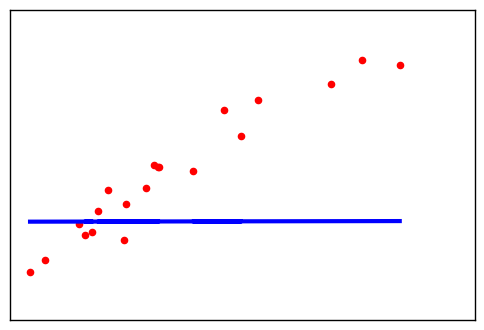

In [21]:
#plotting the output
plt.scatter(stock_x_test, stock_y_test, color='red')
plt.plot(stock_x_test,regr.predict(stock_x_test),color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()